In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%run read&clean.ipynb
%run Jean.ipynb

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

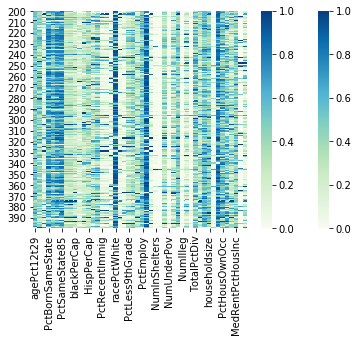

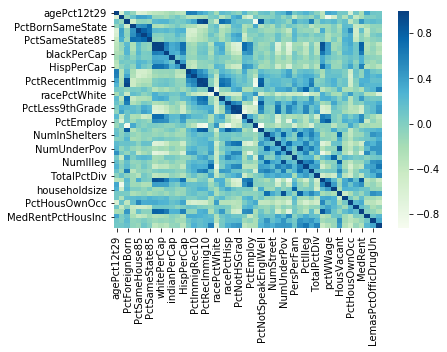

PctForeignBorn PctRecentImmig
PctForeignBorn PctRecImmig10
PctForeignBorn PctNotSpeakEnglWell
PctSameHouse85 PctSameCity85
PctSameCity85 PctSameHouse85
perCapInc whitePerCap
perCapInc medIncome
whitePerCap perCapInc
whitePerCap medIncome
PctImmigRecent PctImmigRec10
PctImmigRec10 PctImmigRecent
PctRecentImmig PctForeignBorn
PctRecentImmig PctRecImmig10
PctRecImmig10 PctForeignBorn
PctRecImmig10 PctRecentImmig
PctRecImmig10 PctNotSpeakEnglWell
racePctHisp PctNotSpeakEnglWell
PctLess9thGrade PctNotHSGrad
PctNotHSGrad PctLess9thGrade
PctEmploy pctWWage
PctNotSpeakEnglWell PctForeignBorn
PctNotSpeakEnglWell PctRecImmig10
PctNotSpeakEnglWell racePctHisp
NumUnderPov NumIlleg
NumUnderPov HousVacant
NumIlleg NumUnderPov
NumIlleg HousVacant
medIncome perCapInc
medIncome whitePerCap
medIncome MedRent
pctWWage PctEmploy
HousVacant NumUnderPov
HousVacant NumIlleg
MedRent medIncome


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()
df_clean_columns = df_clean.columns

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()

correlation_df_fold_2 = correlation_df[correlation_df['fold']==2]
correlation_df_fold_2 = correlation_df_fold_2.drop(columns = 'fold')
correlation_df_fold_2 = correlation_df_fold_2.astype(float)

df_fold_3 = correlation_df[correlation_df['fold']==3]
df_fold_3 = df_fold_3.drop(columns = 'fold')

#Simple heatmap

sns.heatmap(correlation_df_fold_2, cmap = 'GnBu')
plt.show()

#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent

columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if (correlation_df_fold_1[columns[i]][j] > 0.8) & (correlation_df_fold_1[columns[i]][j] != 1):
            print(columns[i], columns[j])

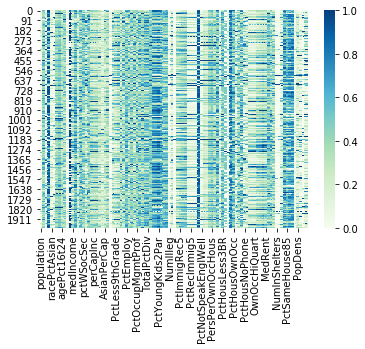

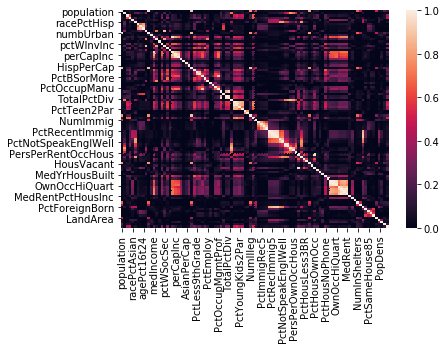

Determination coefficient between 0.7 and 0.8 population NumIlleg 0.783540573041492
Determination coefficient between 0.7 and 0.8 householdsize PersPerFam 0.7143637379894577
Determination coefficient between 0.7 and 0.8 householdsize PersPerOccupHous 0.7970307533036676
Determination coefficient between 0.7 and 0.8 racePctHisp PctSpeakEnglOnly 0.7931997591770562
Determination coefficient between 0.7 and 0.8 racePctHisp PctNotSpeakEnglWell 0.7963881223962999
Determination coefficient between 0.7 and 0.8 racePctHisp PctPersDenseHous 0.772456054528342
Determination coefficient between 0.7 and 0.8 agePct65up pctWWage 0.7032533655905377
Determination coefficient between 0.7 and 0.8 numbUrban NumIlleg 0.7686334690627957
Determination coefficient between 0.7 and 0.8 numbUrban HousVacant 0.7880850218105938
Determination coefficient between 0.7 and 0.8 medIncome perCapInc 0.7997921420566793
Determination coefficient between 0.7 and 0.8 medIncome whitePerCap 0.7051375321911892
Determination coeff

In [36]:
#df_clean = df_clean.drop(columns = 'fold')
#df_clean = df_clean.drop(columns = 'state')
#df_clean = df_clean.drop(columns = 'communityname')

df_clean = df_clean.astype(float)

#Simple heatmap
sns.heatmap(df_clean, cmap = 'GnBu')
plt.show()

#Correlation heatmap 
sns.heatmap(df_clean.astype(float).corr()**2)
fig = plt.figure(figsize = (16,12))
plt.show()


df_clean_correlation = df_clean.astype(float).corr()**2
columns_df_clean = df_clean_correlation.columns
determination_coefficient_first = ''
determination_coefficient_second = ''
determination_coefficient_third = ''


for i in range (0, len(columns_df_clean)):
    for j in range(0, len(df_clean_correlation)):
        if (df_clean_correlation[columns_df_clean[i]][j] > 0.7) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.8):
            determination_coefficient_first+=('Determination coefficient between 0.7 and 0.8 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+ ' '+str(df_clean_correlation[columns_df_clean[i]][j])+ '\n')
        
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.8) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.9):
            determination_coefficient_second+=('Determination coefficient between 0.8 and 0.9 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.9) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.95):
            determination_coefficient_third+=('Determination coefficient between 0.9 and 0.95 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
#print(determination_coefficient_first)
#print(determination_coefficient_second)
#print(determination_coefficient_third)

edouard_text = determination_coefficient_first+determination_coefficient_second+determination_coefficient_third
print(edouard_text)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_fold_3)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = df_fold_3.columns
finalDf = pd.concat([principalDf, pd.DataFrame(target)], axis=1)
finalDf['target'] = finalDf[finalDf.columns[2]]
finalDf = finalDf.drop(finalDf.columns[2],axis=1)
print(finalDf)

     principal component 1  principal component 2               target
0                 0.485653              -0.518277          agePct12t29
1                 1.039866              -0.115782           agePct65up
2                 0.354473              -0.510943       PctForeignBorn
3                 0.891906               0.657951     PctBornSameState
4                 0.739834               0.568988       PctSameHouse85
5                 1.122907               0.615663        PctSameCity85
6                -0.184252              -0.291936       PctSameState85
7                 0.787629              -0.080296            perCapInc
8                 0.690920              -0.446963          whitePerCap
9                -0.525485               0.745233          blackPerCap
10                1.504280              -0.086121         indianPerCap
11                0.303574               0.158868          AsianPerCap
12                0.046127              -0.595083           HispPerCap
13    

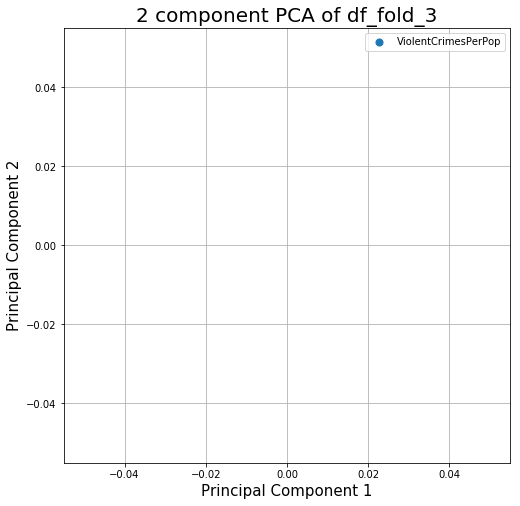

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of df_fold_3', fontsize = 20)
targets = target
for target in zip(targets):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()



In [18]:
from sklearn.manifold import LocallyLinearEmbedding
numberOfNeighbors = [3, 5, 8, 10, 12, 15]


for i in range(0, len(numberOfNeighbors)):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=numberOfNeighbors[i])
    principalComponents = lle.fit_transform(df_fold_3)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    principalDf['target'] = target
    finalDf = principalDf

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    title = 'LocallyLinearEmbedding, number of neighbors = '+ str(numberOfNeighbors[i])
    ax.set_title(title, fontsize=20)
    targets = ['AML', 'ALL']
    colors = ['y', 'b']
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c=color
                   , s=50)
    ax.legend(targets)
    ax.grid()

    plt.show()

ValueError: Length of values does not match length of index